# Waldemar Chang - Assignment 1: Getting to Know the Data
## EN.705.603.82.FA24 Creating AI-Enabled Systems

### Task 1

##### Below is the function called `__merge()` that takes the arguments `customer_filename: str`, `transaction_filename: str`, and `fraud_filename: str`.

In [4]:
# Import all necessary libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import re
from datetime import datetime

In [5]:
# Define __merge function to process and merge customer, transaction, and fraud data
def __merge(customer_filename: str, transaction_filename: str, fraud_filename:str):
    customer_df = pd.read_csv(customer_filename)
    
    with open(fraud_filename) as reader:
        fraud_release = json.load(reader)
    fraud_df = pd.json_normalize(fraud_release)  # Flatten JSON file in case of nested structures
    t_fraud_df = fraud_df.T  # Transpose to align number of rows before merge

    # Reset index column for renaming columns properly
    t_fraud_df = t_fraud_df.reset_index()
    t_fraud_df.rename(columns={'index': 'trans_num'}, inplace=True)
    t_fraud_df.rename(columns={0: 'fraudulence'}, inplace=True)
    
    transaction_df = pd.read_parquet(transaction_filename)

    # Merge fraud and transaction data via outer join on trans_num column
    fraud_trans_df = pd.merge(t_fraud_df, transaction_df, on='trans_num', how='outer')
    
    # Complete the merge with customer data via outer join on cc_num column
    merged_df = pd.merge(customer_df, fraud_trans_df, on='cc_num', how='outer')

    # Sort data frame by transaction date and time and index by trans_num
    sorted_df = merged_df.sort_values(by='trans_date_trans_time')
    sorted_df.set_index('trans_num', inplace=True)

    return sorted_df

##### Let's preview the data frame to ensure the proper index and sort are in place.
- Ensure data source files are in the same folder as this Jupyter Notebook before running the following code.

In [7]:
df = __merge('customer_release.csv', 'transactions_release.parquet', 'fraud_release.json')
df.columns

Index(['cc_num', 'index_x', 'first', 'last', 'sex', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'fraudulence',
       'index_y', 'trans_date_trans_time', 'unix_time', 'merchant', 'category',
       'amt', 'merch_lat', 'merch_long'],
      dtype='object')

In [8]:
df.head()

,cc_num,index_x,first,last,sex,street,city,state,zip,lat,...,dob,fraudulence,index_y,trans_date_trans_time,unix_time,merchant,category,amt,merch_lat,merch_long
trans_num,,,,,,,,,,,,,,,,,,,,,
0b242abb623afc578575680df30655b9,2703186189652095,0,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,36.0788,...,"Mar 09, 1988",0.0,0,2019-01-01 00:00:18,1.325376e+09,None,MISC_NET,4.97,36.011293,-82.048315
1f76529f8574734946361c461b024d99,630423337322,1,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,48.8878,...,21-Jun-1978,0.0,1,2019-01-01 00:00:44,1.325376e+09,None,GROCERY_POS,107.23,49.159047,-118.186462
a1a22d70485983eac12b5b88dad1cf95,38859492057661,2,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252.0,42.1808,...,19-Jan-1962,0.0,2,2019-01-01 00:00:51,1.325376e+09,fraud_Lind-Buckridge,entertainment,220.11,43.150704,-112.154481
6b849c168bdad6f867558c3793159a81,3534093764340240,3,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632.0,46.2306,...,12-Jan-1967,0.0,3,2019-01-01 00:01:16,1.325376e+09,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,47.034331,-112.561071
a41d7549acf90789359a9aa5346dcb46,375534208663984,4,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433.0,38.4207,...,28/03/1986,0.0,4,2019-01-01 00:03:06,1.325376e+09,fraud_Keeling-Crist,MISC_POS,41.96,38.674999,-78.632459


##### The function returns a pandas DataFrame that merges data sources, indexed by `trans_num` and sorted by `trans_date_trans_time`.

### Task 2

##### Insight 1: The frequency of fraudulent transactions depends on the hour of the day the transaction occurs.

In [12]:
# Create new column that shows the hour
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour

# Group by hour and count fraud frequency
hr_fraud_freq = df[df['fraudulence'] == 1].groupby('hour').size()

hour
0      568
1      569
2      566
3      547
4       46
5       58
6       38
7       47
8       43
9       42
10      33
11      42
12      50
13      60
14      60
15      79
16      66
17      64
18      71
19      70
20      63
21      65
22    1639
23    1610
dtype: int64


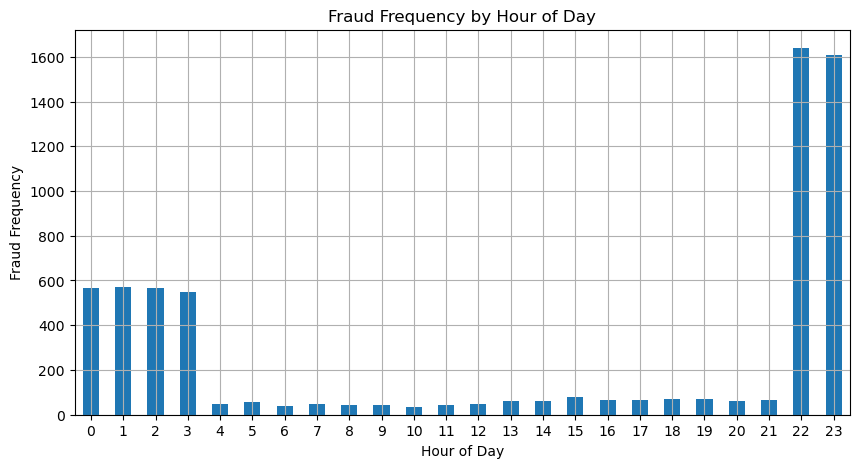

In [13]:
# Print frequency table
print(hr_fraud_freq)

# Plot frequency table
hr_fraud_freq.plot(kind='bar', figsize=(10,5))
plt.xticks(rotation=360)
plt.title('Fraud Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Frequency')
plt.grid(True)
plt.show()

##### Analysis:
- The data clearly shows that the frequency of fraudulent transactions varies depending on the hour of the day.
- The highest frequency of fraudulent transactions occurs during the 22nd hour (10:00 PM), followed closely by the 23rd hour (11:00 PM).
- Significant frequencies are also observed from midnight until 3:00 AM, with the number of fraudulent transactions ranging from 547 to 569 per hour.
- This pattern could suggest that perpetrators are exploiting the late-night hours, when human vigilance is typically lower, to carry out fraudulent activities.
- This corroborates the analysts' insight that the frequency depends on the hour of the day.

##### Insight 2: The frequency of fraudulent transactions depends on the day of week the transaction occurs.

In [16]:
# Create new column that shows the day of week
df['weekday'] = df['trans_date_trans_time'].dt.day_name()

# Group frequency by day of week and sort ordinally
wkday_fraud_freq = df[df['fraudulence'] == 1].groupby('weekday').size()
wkday_fraud_freq = wkday_fraud_freq.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

weekday
Sunday       1048
Monday       1034
Tuesday       873
Wednesday     778
Thursday      916
Friday        899
Saturday      948
dtype: int64


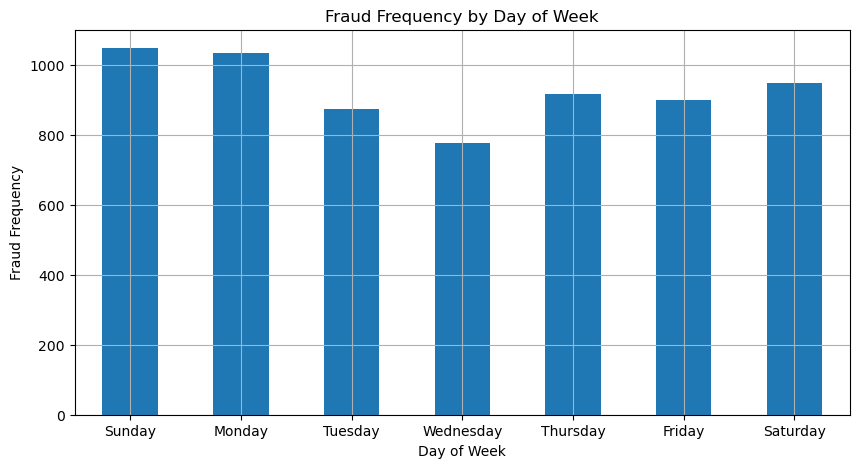

In [17]:
# Print fraud frequency table
print(wkday_fraud_freq)

# Plot fraud frequency table
wkday_fraud_freq.plot(kind='bar', figsize=(10,5))
plt.xticks(rotation=360)
plt.title('Fraud Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Fraud Frequency')
plt.grid(True)
plt.show()

##### Analysis:
- The data suggests a correlation between the frequency of fraudulent transactions and the day of the week.
- The highest frequency of fraudulent transactions occurs on Sunday, followed closely by Monday, with the lowest frequency on Wednesday.
- There appears to be an uptick in fraudulent activity during the weekend and on Monday, which then slows down as the week progresses.
- This pattern could be related to perpetrators exploiting schedules during days with lower human vigilance.
- These findings corroborate the analysts' insight that fraudulent activity frequency varies by day of the week.

##### Insight 3: The frequency of fraudulent transactions depends on the month the transaction occurs.

In [20]:
# Create new column that shows the month
df['month'] = df['trans_date_trans_time'].dt.month

# Group fraud frequency by 
mth_fraud_freq = df[df['fraudulence'] == 1].groupby('month').size()

month
1     540
2     560
3     581
4     433
5     671
6     549
7     449
8     581
9     501
10    555
11    486
12    590
dtype: int64


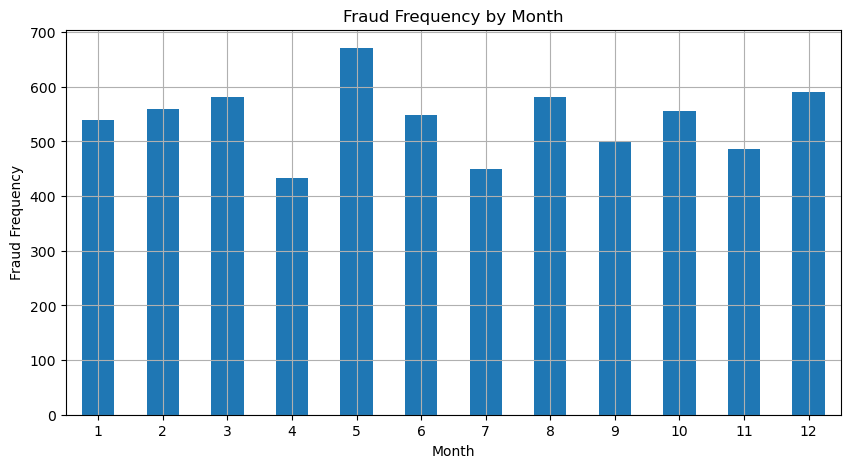

In [21]:
# Print frequency table
print(mth_fraud_freq)

# Plot frequency table
mth_fraud_freq.plot(kind='bar', figsize=(10,5))
plt.title('Fraud Frequency by Month')
plt.xlabel('Month')
plt.xticks(rotation=360)
plt.ylabel('Fraud Frequency')
plt.grid(True)
plt.show()

##### Analysis:
- The data shows that the frequency of fraudulent transactions varies by month.
- The highest frequency of fraudulent transactions occurs in May, followed by December, while the lowest frequency is observed in April.
- While not strongly evident, there appears to be a subtle oscillatory pattern where the frequency of fraudulent transactions rises and falls from month to month.
- The increase in fraud frequency in May might be related to the timing of tax refunds, though this remains a hypothesis.
- These findings corroborate the analysts' insight that fraudulent activity frequency varies by month.

##### Insight 4:  Fraudulent transactions are likely to occur in quick succession.

In [24]:
# Group fraud transactions per customer
fraud_per_cust = df[df['fraudulence'] == 1].groupby('cc_num')

In [25]:
# Define function to compute time intervals between fraud transactions
def time_interval(table):
    table = table.sort_values('trans_date_trans_time')
    
    # Use .diff() to compute difference between consecutive items and convert to minutes
    table['time_interval'] = table['trans_date_trans_time'].diff().dt.total_seconds()/60

    return table

# Apply function to the entire table
time_intervals = fraud_per_cust.apply(time_interval)

C:\Users\walde\AppData\Local\Temp\ipykernel_7072\3998472089.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_intervals = fraud_per_cust.apply(time_interval)


In [26]:
# Drop NaN values created by the initial timestamp
time_intervals = time_intervals.dropna(subset=['time_interval'])
print(time_intervals.iloc[:, -1:])  # Print only the time interval column

                                                      time_interval
cc_num              trans_num                                      
60416207185         e59cab77e36f552efdb0daa91b8e6683    1294.083333
                    3becc6c1b0902b23cc621512b5709568    1383.666667
                    e29fe2c9dee909dc9013fbdaa8684e7b      51.266667
                    38b0924485d5eb7978ed2f2b04a1dc72       6.233333
                    2285e041091c98cf8d78dc8710814732      35.533333
...                                                             ...
4992346398065154184 3799031bfaa2eaff4f195b7abbe07f62       5.516667
                    80a880d8f2fa3a24ebef9fbf93b4136f     164.983333
                    18a89e9363dc82e07e44288ada82c115     734.433333
                    2dfe4a737daedf1a3a9588296f820804     433.583333
                    08637f518d059daf136435c0d6cba7a8      15.050000

[5764 rows x 1 columns]


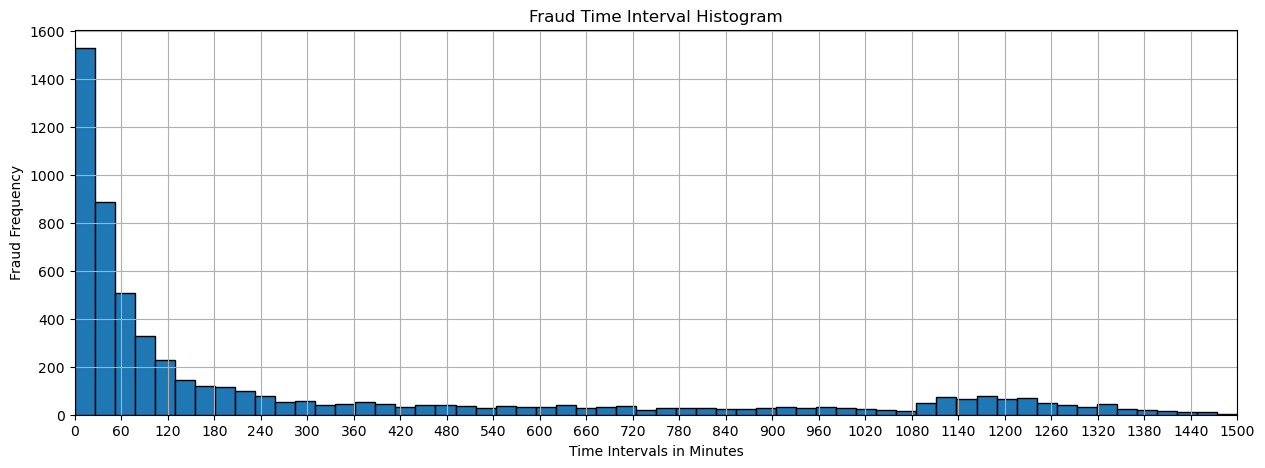

In [27]:
# Plot histogram with bin size 100 for more granularity
plt.figure(figsize=(15, 5))
plt.hist(time_intervals['time_interval'], bins=100, edgecolor='black')

# Set readable title, labels, tick marks, and grid lines
plt.title('Fraud Time Interval Histogram')
plt.xlabel('Time Intervals in Minutes')
plt.xticks(np.arange(0, 3000, 60))
plt.xlim(0, 1500)  # Focus on range of interest
plt.ylabel('Fraud Frequency')
plt.grid(True)
plt.show()

##### Analysis:
- The data shows that the frequency of fraudulent transactions is heavily concentrated in the lower time intervals, with the highest frequency observed within the first 30 minutes.
- As time intervals increase, there is a steep decrease in fraud frequency, suggesting that most fraudulent activities occur immediately after an access-enabling event.
- The distribution is right-skewed, with very few fraudulent transactions occurring after the 300-minute mark.
- This pattern likely reflects the need for fraudulent activities to occur quickly in succession to minimize the risk of detection.
- These findings support the analysts' insight that fraudulent transactions are most likely to happen in rapid succession following an enabling event.

##### Personal Insight 1: The frequency of fraudulent activity varies significantly across different age demographics.

In [30]:
# Define custom function to extract year
def extract_year(date_str):
    # Find 4-digit year first
    match = re.search(r'\b(\d{4})\b', date_str)
    if match:
        return match.group(1)
    # Handle 2-digit years and assume 1900s or 2000s based on context
    match = re.search(r'\b(\d{2})\b', date_str)
    if match and int(match.group(1)) <= 99:
        year = int(match.group(1))
        return f"19{year:02d}" if year > 21 else f"20{year:02d}"
    return None  # Return None if no valid year found

In [31]:
# Convert all entries to strings
df['dob_str'] = df['dob'].astype(str)

# Extract year using regex
df['year'] = df['dob_str'].apply(extract_year)

# Create age column
this_year = datetime.now().year
df['age'] = this_year - df['year'].astype(int)

print(df['age'])

trans_num
0b242abb623afc578575680df30655b9    36
1f76529f8574734946361c461b024d99    46
a1a22d70485983eac12b5b88dad1cf95    62
6b849c168bdad6f867558c3793159a81    57
a41d7549acf90789359a9aa5346dcb46    38
                                    ..
9b1f753c79894c9f4b71f04581835ada    58
2090647dac2c89a1d86c514c427f5b91    25
6c5b7c8add471975aa0fec023b2e8408    43
14392d723bb7737606b2700ac791b7aa    59
1765bb45b3aa3224b4cdcb6e7a96cee3    31
Name: age, Length: 1647542, dtype: int32


In [32]:
# Group fraudulent activity by age
age_fraud_freq = df[df['fraudulence'] == 1].groupby('age').size()
print(age_fraud_freq)

age
19     6
20    19
21    20
23    32
24    29
      ..
94    14
95    36
96    17
97    29
98    29
Length: 79, dtype: int64


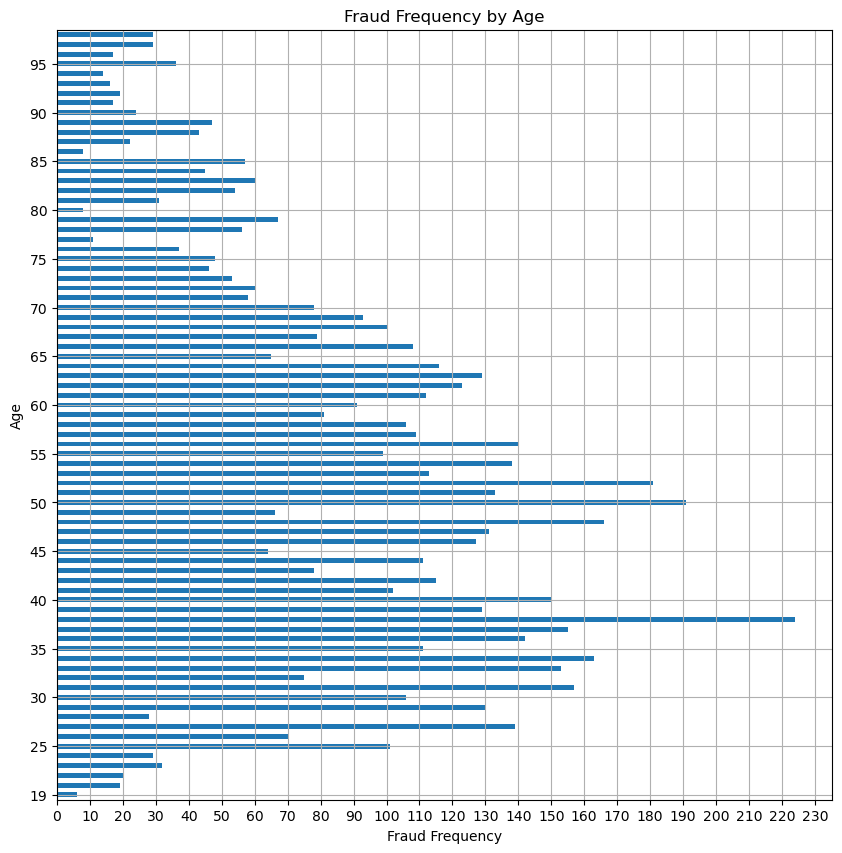

In [33]:
# Plot fraud frequency by age
age_fraud_freq.plot(kind='barh', figsize=(10, 10))
plt.title('Fraud Frequency by Age')
plt.xlabel('Fraud Frequency')
plt.xticks(np.arange(0, 240, 10), rotation=360)
plt.ylabel('Age')
plt.yticks(np.arange(0, 80, 5))
plt.grid(True)
plt.show()

##### Analysis on Fraud Frequency by Age:
- The data indicates that individuals in the age demographic from their 30s to their 50s are more frequently targeted for fraudulent activity.
- Conversely, individuals in their 20s and younger, as well as those above retirement age (65 and older), tend to be targeted less frequently, likely because younger people often have less financial resources, making them less attractive targets for fraudsters.
- This trend is likely due to middle-aged individuals having more financial stability, thus offering more opportunities for fraudsters to exploit.
- Regarding the elderly, their spending habits may be more predictable and less frequent, making them less attractive targets for certain types of fraud, as fraudsters may rely on unpredictable spending habits to hide their fraudulent activities.

##### Personal Insight 2: The frequency of fraudulent activity varies across different dollar amount ranges, with some amounts more prone to fraud than others.

In [36]:
# Determine dollar amount range and number of bins
amt_range = max(df['amt']) - min(df['amt'])
num_amts = len(df['amt'])
num_bins = int(np.ceil(np.log2(num_amts) + 1))
bin_width = round(amt_range/num_bins)
print(bin_width)

1316


In [37]:
# Group fraud frequency by amount bins
bins = np.arange(min(df['amt']), max(df['amt']), bin_width)
df['amt_bins'] = pd.cut(df['amt'], bins=bins, right=False)
amt_fraud_freq = df[df['fraudulence'] == 1].groupby('amt_bins').size()

C:\Users\walde\AppData\Local\Temp\ipykernel_7072\1845461317.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_fraud_freq = df[df['fraudulence'] == 1].groupby('amt_bins').size()


In [38]:
# View table and ensure correct amount of total transactions
print(amt_fraud_freq)
print()
print(len(df[df['fraudulence'] == 1]))

amt_bins
[1.0, 1317.0)         6493
[1317.0, 2633.0)         3
[2633.0, 3949.0)         0
[3949.0, 5265.0)         0
[5265.0, 6581.0)         0
[6581.0, 7897.0)         0
[7897.0, 9213.0)         0
[9213.0, 10529.0)        0
[10529.0, 11845.0)       0
[11845.0, 13161.0)       0
[13161.0, 14477.0)       0
[14477.0, 15793.0)       0
[15793.0, 17109.0)       0
[17109.0, 18425.0)       0
[18425.0, 19741.0)       0
[19741.0, 21057.0)       0
[21057.0, 22373.0)       0
[22373.0, 23689.0)       0
[23689.0, 25005.0)       0
[25005.0, 26321.0)       0
[26321.0, 27637.0)       0
dtype: int64

6496


##### It appears that the dollar amount range of fraudulent activity does not surpass a specific bin, so we will readjust our range.

In [40]:
# Determine new dollar amount range and new number of bins
amt_range = 1392.0 - min(df['amt'])
num_amts = len(df[df['fraudulence'] == 1])
num_bins = int(np.ceil(np.log2(num_amts) + 1))
bin_width = round(amt_range/num_bins)
print(bin_width)

99


In [41]:
# Group fraud frequency by new amount bins
bins = np.arange(min(df['amt']), 1392.0, bin_width)
df['amt_bins'] = pd.cut(df['amt'], bins=bins, right=False)
amt_fraud_freq = df[df['fraudulence'] == 1].groupby('amt_bins').size()

C:\Users\walde\AppData\Local\Temp\ipykernel_7072\378834532.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_fraud_freq = df[df['fraudulence'] == 1].groupby('amt_bins').size()


In [42]:
# View table and ensure correct amount of total transactions
print(amt_fraud_freq)
print()
print(amt_fraud_freq.sum())

amt_bins
[1.0, 100.0)        1503
[100.0, 199.0)       160
[199.0, 298.0)       598
[298.0, 397.0)      1084
[397.0, 496.0)        85
[496.0, 595.0)       101
[595.0, 694.0)       143
[694.0, 793.0)       511
[793.0, 892.0)       710
[892.0, 991.0)       729
[991.0, 1090.0)      586
[1090.0, 1189.0)     240
[1189.0, 1288.0)      40
[1288.0, 1387.0)       6
dtype: int64

6496


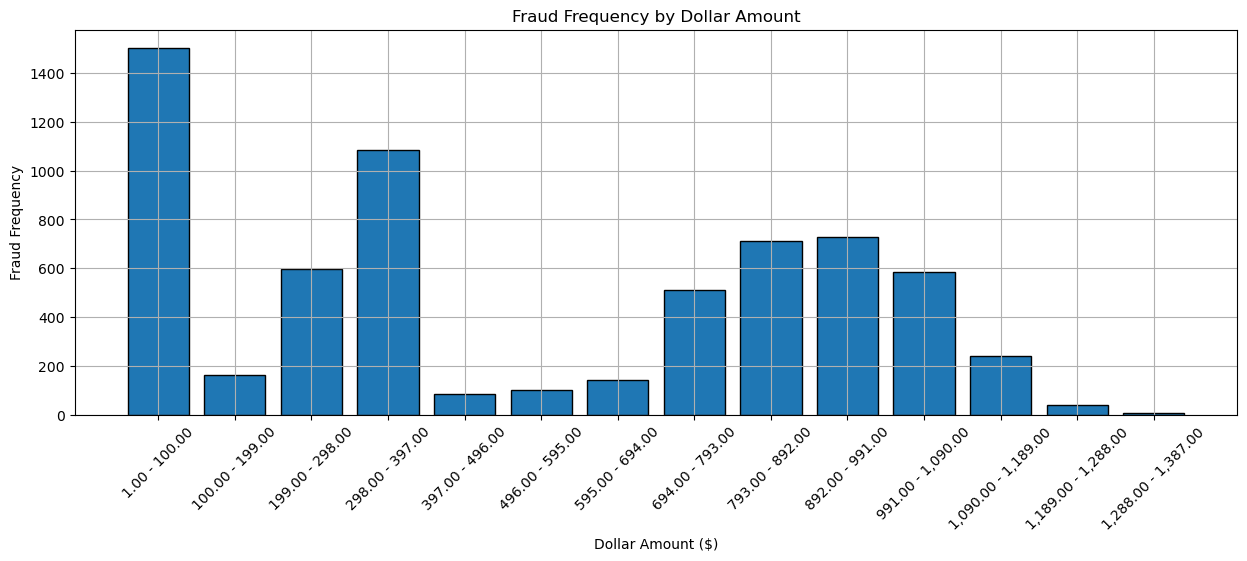

In [43]:
# Convert amounts to currency format with list comprehension
format_amts = [f'{float(interval.left):,.2f} - {float(interval.right):,.2f}' for interval in amt_fraud_freq.index]

plt.figure(figsize=(15, 5))
plt.bar(format_amts, amt_fraud_freq.values, edgecolor='black')
plt.title('Fraud Frequency by Dollar Amount')
plt.xlabel('Dollar Amount ($)')
plt.xticks(rotation=45)
plt.ylabel('Fraud Frequency')
plt.grid(True)
plt.show()

##### Analysis on Fraud Frequency by Dollar Amount:
- The data indicates that most fraudulent transactions occur in amounts under 100.00.
- This may be because everyday purchases often fall within this range, allowing fraudsters to conceal their activities within smaller transactions that are less likely to raise suspicion.
- Another notable peak is observed in the 298.00 - 397.00 range, where the transaction amount might be significant enough to be valuable but still small enough to evade attention.
- Further analysis, particularly comparing purchase categories with these dollar amounts, would be necessary to understand the patterns in specific industries or types of purchases.
- There is also moderate activity in the 793.00 - 1090.00 range, which could represent a "higher-risk, higher-reward" strategy for fraudsters.
This non-uniform distribution supports the observation that certain transaction sizes are systematically more vulnerable to fraud.
- It is interesting to note that there are no fraudulent transactions recorded in the 1,387.00 to 27,637.00 range. This could be because higher transaction amounts are more likely to trigger fraud detection systems or raise red flags, making it riskier for fraudsters to target these amounts.